<a href="https://colab.research.google.com/github/dckeisy/projectIII_dataMin/blob/google_colab/projectIII_DataMin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Carga y comprensión inicial de los datos**

Clonar repositorio

In [ ]:
! git clone https://github.com/dckeisy/projectIII_dataMin.git

fatal: destination path 'projectIII_dataMin' already exists and is not an empty directory.


Importar librería para trabajar los datos del repositorio

In [ ]:
import pandas as pd

Leer datos

In [ ]:
data = pd.read_csv("/content/projectIII_dataMin/datos.csv")

Comprender el dataset

In [ ]:
print("Primeras filas del dataset:")
print(data.head())
print("\nTipos de datos por columna:")
print(data.dtypes)
print("\nTamaño del dataset:")
print(f"Filas: {data.shape[0]}, Columnas: {data.shape[1]}")

print("\nVariables Discretas:")
print(data.select_dtypes(include=['int64']))
print("\nVariables Continuas:")
print(data.select_dtypes(include=['float64']))
print("\nVariables Categoricas:")
print(data.select_dtypes(include=['object']))





Primeras filas del dataset:
  churn  accountlength internationalplan voicemailplan  numbervmailmessages  \
0    No            128                no           yes                   25   
1    No            107                no           yes                   26   
2    No            137                no            no                    0   
3    No             84               yes            no                    0   
4    No             75               yes            no                    0   

   totaldayminutes  totaldaycalls  totaldaycharge  totaleveminutes  \
0            265.1            110           45.07            197.4   
1            161.6            123           27.47            195.5   
2            243.4            114           41.38            121.2   
3            299.4             71           50.90             61.9   
4            166.7            113           28.34            148.3   

   totalevecalls  totalevecharge  totalnightminutes  totalnightcalls  \
0   

# **Limpiar y preparar los datos**

Identificar valores nulos

In [ ]:
print("Valores nulos por columna:")
print(data.isnull().sum())



Valores nulos por columna:
CustomerChurn            0
AccountLength            0
HasInternationalPlan     0
HasVoicemailPlan         0
VoicemailMessageCount    0
DayMinutes               0
DayCalls                 0
DayCharges               0
EveningMinutes           0
EveningCalls             0
EveningCharges           0
NightMinutes             0
NightCalls               0
NightCharges             0
InternationalMinutes     0
InternationalCalls       0
InternationalCharges     0
CustomerServiceCalls     0
dtype: int64


Tratar valores nulos (ejemplo: llenar con media o eliminar filas)

In [ ]:
for columna in data.columns:
    nulos = data[columna].isnull().sum()
    if nulos > 0:
        print(f"Valores nulos en la columna '{columna}': {nulos}")
        if data[columna].dtype in ['float64','int64']:
            mediana = data[columna].median()
            data[columna] = data[columna].fillna(mediana)
            print(f"  - Rellenados con la mediana: {mediana}")
        else:
            media = data[columna].mode()[0]
            data[columna] = data[columna].fillna(media)
            print(f"  - Rellenados con la moda: {media}")

# Visualización de datos duplicados
print("Datos duplicados\n", data.duplicated(keep=False))
# Eliminar duplicados valores duplicados
print("Se eliminan duplicados\n",data.drop_duplicates(inplace=True))










Datos duplicados
 0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool
Se eliminam duplicados
 None


Revisar y convertir tipos de datos si es necesario

In [ ]:
# data['columna_a_convertir'] = data['columna_a_convertir'].astype('tipo_deseado')

Renombrar columnas

In [ ]:
data.rename(columns={
    "churn": "CustomerChurn",
    "accountlength": "AccountLength",
    "internationalplan": "HasInternationalPlan",
    "voicemailplan": "HasVoicemailPlan",
    "numbervmailmessages": "VoicemailMessageCount",
    "totaldayminutes": "DayMinutes",
    "totaldaycalls": "DayCalls",
    "totaldaycharge": "DayCharges",
    "totaleveminutes": "EveningMinutes",
    "totalevecalls": "EveningCalls",
    "totalevecharge": "EveningCharges",
    "totalnightminutes": "NightMinutes",
    "totalnightcalls": "NightCalls",
    "totalnightcharge": "NightCharges",
    "totalintlminutes": "InternationalMinutes",
    "totalintlcalls": "InternationalCalls",
    "totalintlcharge": "InternationalCharges",
    "numbercustomerservicecalls": "CustomerServiceCalls"
}, inplace=True)


Tratar variables categóricas

In [ ]:
data['CustomerChurn'] = data['CustomerChurn'].astype(str).str.lower().map({'no': 0, 'yes': 1})
data['HasInternationalPlan'] = data['HasInternationalPlan'].astype(str).str.lower().map({'no': 0, 'yes': 1})
data['HasVoicemailPlan'] = data['HasVoicemailPlan'].astype(str).str.lower().map({'no': 0, 'yes': 1})

Revisar el cambio de las variables categóricas

In [ ]:
print(data.head(12))

    CustomerChurn  AccountLength  HasInternationalPlan  HasVoicemailPlan  \
0               0            128                     0                 1   
1               0            107                     0                 1   
2               0            137                     0                 0   
3               0             84                     1                 0   
4               0             75                     1                 0   
5               0            118                     1                 0   
6               0            121                     0                 1   
7               0            147                     1                 0   
8               0            117                     0                 0   
9               0            141                     1                 1   
10              1             65                     0                 0   
11              0             74                     0                 0   

    Voicema

# **Análisis univariado**

Estadísticas descriptivas

In [ ]:
print("Estadísticas descriptivas:")
print(data.describe())

Estadísticas descriptivas:
       CustomerChurn  AccountLength  HasInternationalPlan  HasVoicemailPlan  \
count    5000.000000     5000.00000           5000.000000       5000.000000   
mean        0.141400      100.25860              0.094600          0.264600   
std         0.348469       39.69456              0.292691          0.441164   
min         0.000000        1.00000              0.000000          0.000000   
25%         0.000000       73.00000              0.000000          0.000000   
50%         0.000000      100.00000              0.000000          0.000000   
75%         0.000000      127.00000              0.000000          1.000000   
max         1.000000      243.00000              1.000000          1.000000   

       VoicemailMessageCount   DayMinutes     DayCalls   DayCharges  \
count            5000.000000  5000.000000  5000.000000  5000.000000   
mean                7.755200   180.288900   100.029400    30.649668   
std                13.546393    53.894699    19.

## Visualizaciones

Librerías

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Histogramas


Variables Numéricas:

Estadísticas descriptivas para CustomerChurn:
count    5000.000000
mean        0.141400
std         0.348469
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: CustomerChurn, dtype: float64


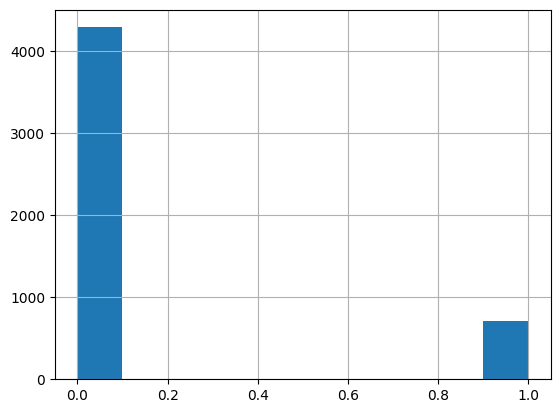


Estadísticas descriptivas para AccountLength:
count    5000.00000
mean      100.25860
std        39.69456
min         1.00000
25%        73.00000
50%       100.00000
75%       127.00000
max       243.00000
Name: AccountLength, dtype: float64


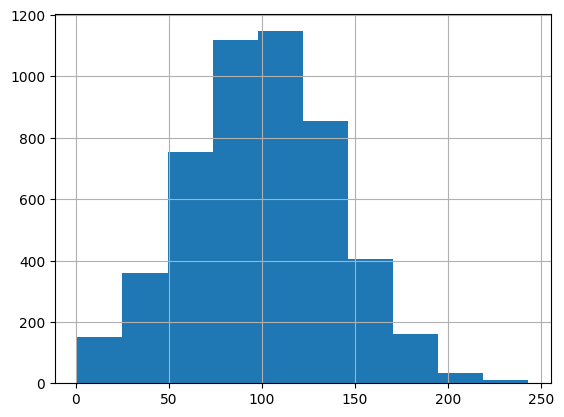


Estadísticas descriptivas para HasInternationalPlan:
count    5000.000000
mean        0.094600
std         0.292691
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: HasInternationalPlan, dtype: float64


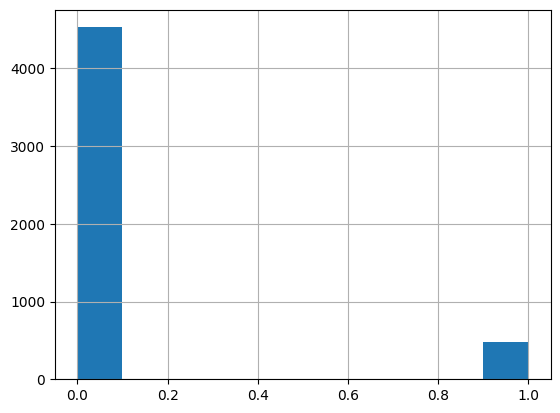


Estadísticas descriptivas para HasVoicemailPlan:
count    5000.000000
mean        0.264600
std         0.441164
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: HasVoicemailPlan, dtype: float64


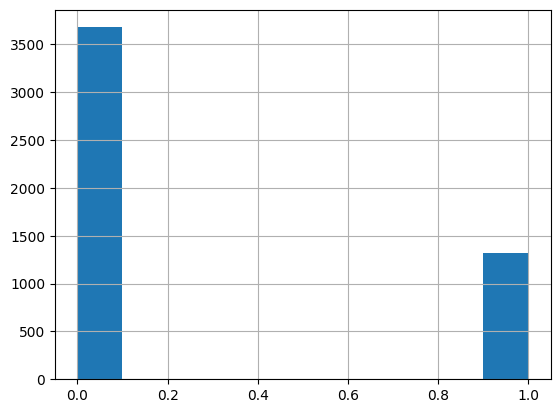


Estadísticas descriptivas para VoicemailMessageCount:
count    5000.000000
mean        7.755200
std        13.546393
min         0.000000
25%         0.000000
50%         0.000000
75%        17.000000
max        52.000000
Name: VoicemailMessageCount, dtype: float64


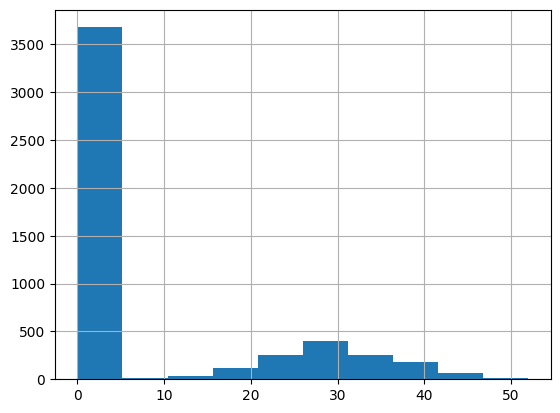


Estadísticas descriptivas para DayMinutes:
count    5000.000000
mean      180.288900
std        53.894699
min         0.000000
25%       143.700000
50%       180.100000
75%       216.200000
max       351.500000
Name: DayMinutes, dtype: float64


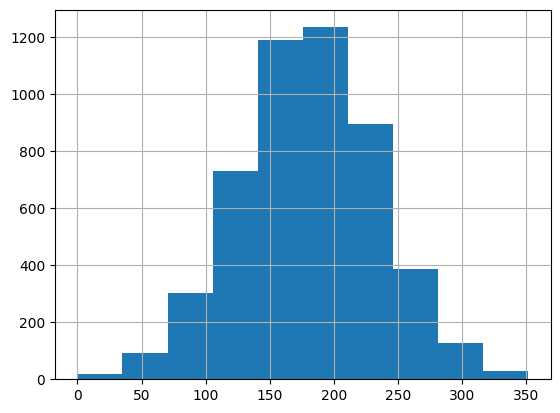


Estadísticas descriptivas para DayCalls:
count    5000.000000
mean      100.029400
std        19.831197
min         0.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       165.000000
Name: DayCalls, dtype: float64


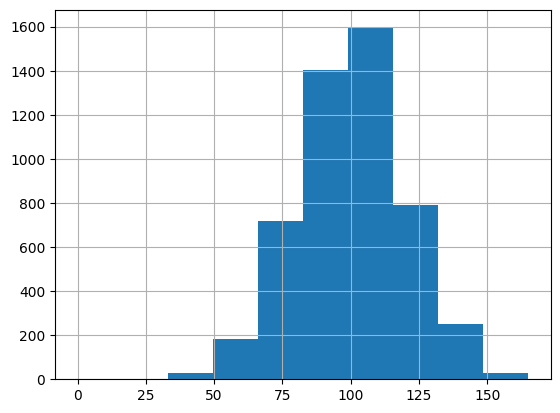


Estadísticas descriptivas para DayCharges:
count    5000.000000
mean       30.649668
std         9.162069
min         0.000000
25%        24.430000
50%        30.620000
75%        36.750000
max        59.760000
Name: DayCharges, dtype: float64


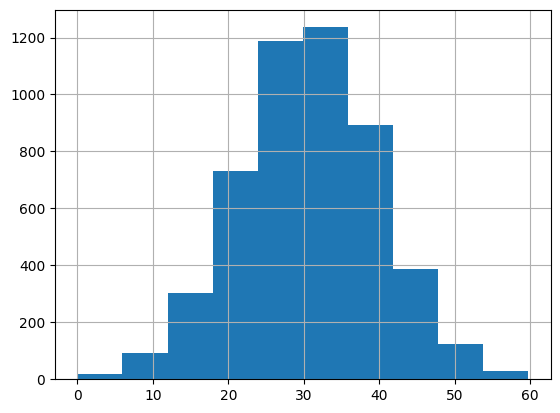


Estadísticas descriptivas para EveningMinutes:
count    5000.000000
mean      200.636560
std        50.551309
min         0.000000
25%       166.375000
50%       201.000000
75%       234.100000
max       363.700000
Name: EveningMinutes, dtype: float64


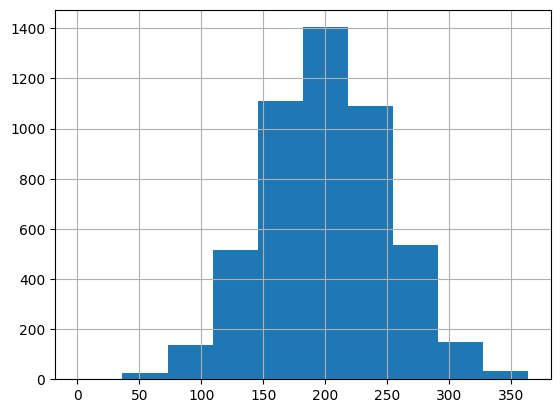


Estadísticas descriptivas para EveningCalls:
count    5000.000000
mean      100.191000
std        19.826496
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       170.000000
Name: EveningCalls, dtype: float64


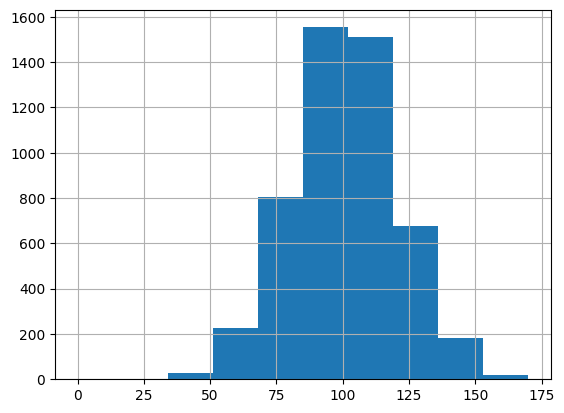


Estadísticas descriptivas para EveningCharges:
count    5000.000000
mean       17.054322
std         4.296843
min         0.000000
25%        14.140000
50%        17.090000
75%        19.900000
max        30.910000
Name: EveningCharges, dtype: float64


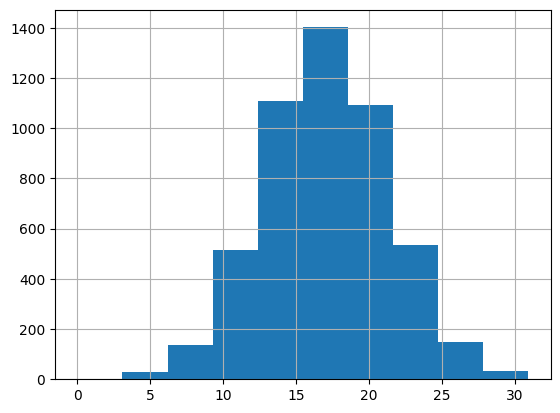


Estadísticas descriptivas para NightMinutes:
count    5000.000000
mean      200.391620
std        50.527789
min         0.000000
25%       166.900000
50%       200.400000
75%       234.700000
max       395.000000
Name: NightMinutes, dtype: float64


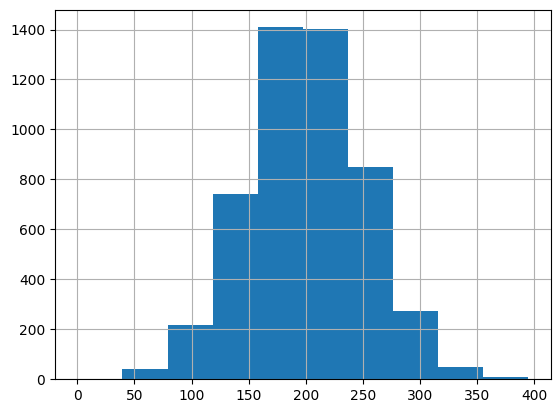


Estadísticas descriptivas para NightCalls:
count    5000.000000
mean       99.919200
std        19.958686
min         0.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       175.000000
Name: NightCalls, dtype: float64


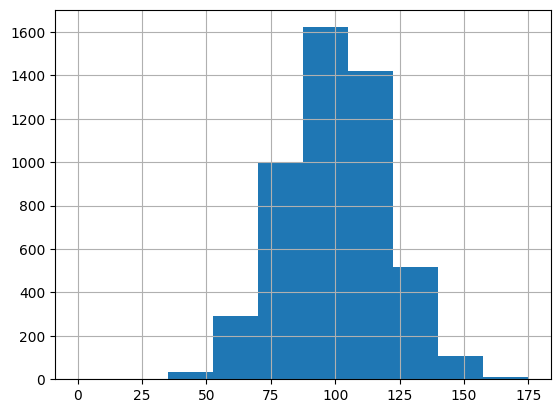


Estadísticas descriptivas para NightCharges:
count    5000.000000
mean        9.017732
std         2.273763
min         0.000000
25%         7.510000
50%         9.020000
75%        10.560000
max        17.770000
Name: NightCharges, dtype: float64


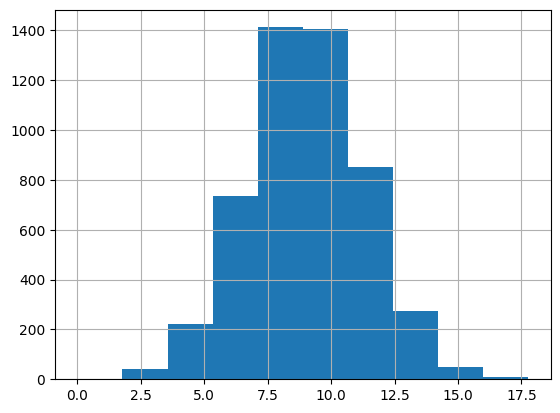


Estadísticas descriptivas para InternationalMinutes:
count    5000.000000
mean       10.261780
std         2.761396
min         0.000000
25%         8.500000
50%        10.300000
75%        12.000000
max        20.000000
Name: InternationalMinutes, dtype: float64


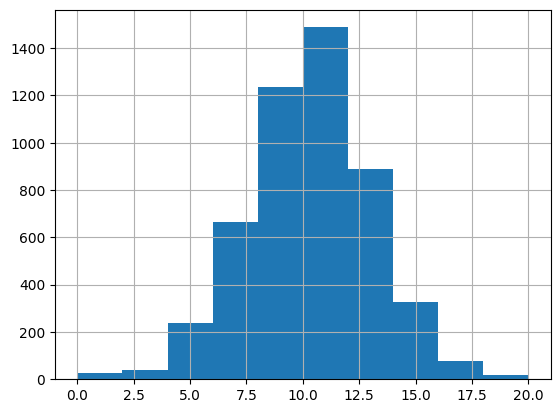


Estadísticas descriptivas para InternationalCalls:
count    5000.000000
mean        4.435200
std         2.456788
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: InternationalCalls, dtype: float64


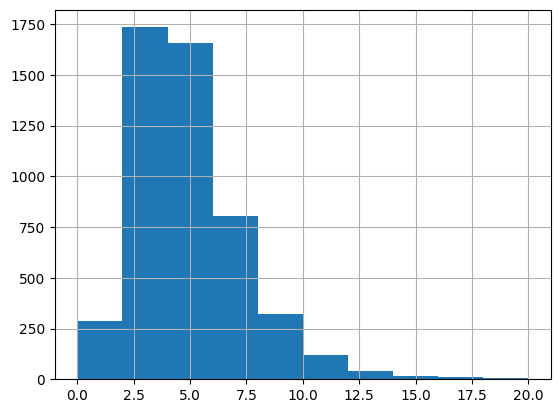


Estadísticas descriptivas para InternationalCharges:
count    5000.000000
mean        2.771196
std         0.745514
min         0.000000
25%         2.300000
50%         2.780000
75%         3.240000
max         5.400000
Name: InternationalCharges, dtype: float64


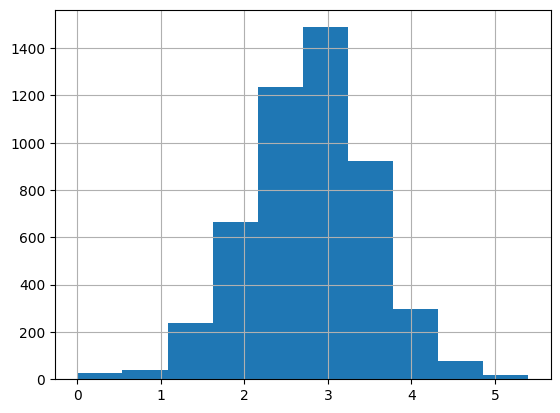


Estadísticas descriptivas para CustomerServiceCalls:
count    5000.000000
mean        1.570400
std         1.306363
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: CustomerServiceCalls, dtype: float64


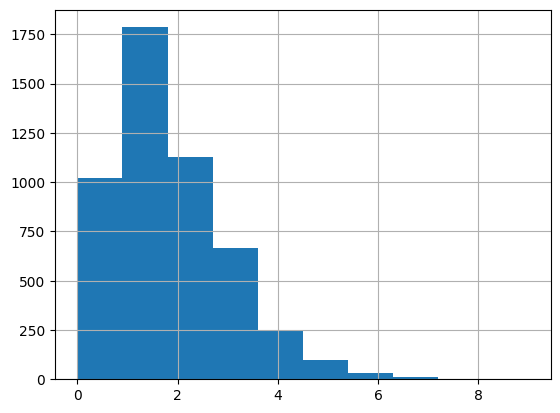

In [ ]:
numerical_cols = data.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 0:
        print("\nVariables Numéricas:")
        for col in numerical_cols:
            print(f"\nEstadísticas descriptivas para {col}:")
            stats = data[col].describe()
            print(stats)
            data[col].hist()
            plt.show()

Boxplots


Variables Numéricas:

Estadísticas descriptivas para CustomerChurn:
count    5000.000000
mean        0.141400
std         0.348469
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: CustomerChurn, dtype: float64


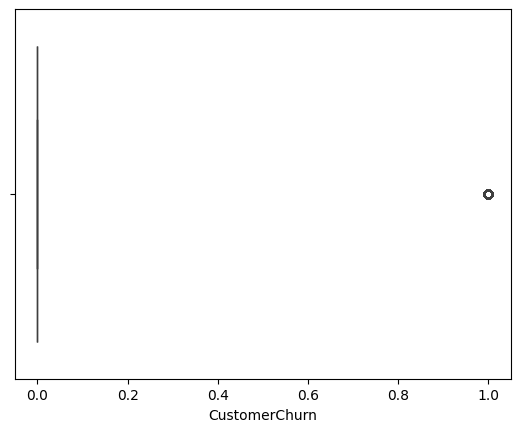


Estadísticas descriptivas para AccountLength:
count    5000.00000
mean      100.25860
std        39.69456
min         1.00000
25%        73.00000
50%       100.00000
75%       127.00000
max       243.00000
Name: AccountLength, dtype: float64


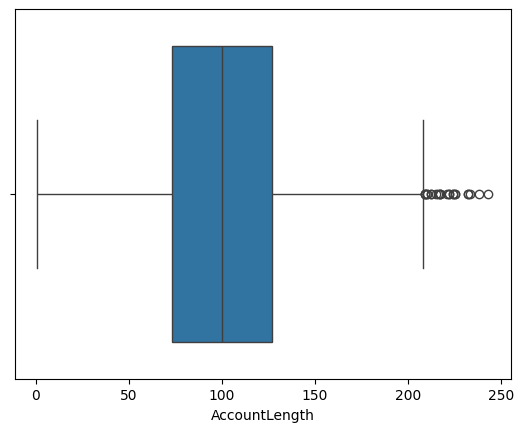


Estadísticas descriptivas para HasInternationalPlan:
count    5000.000000
mean        0.094600
std         0.292691
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: HasInternationalPlan, dtype: float64


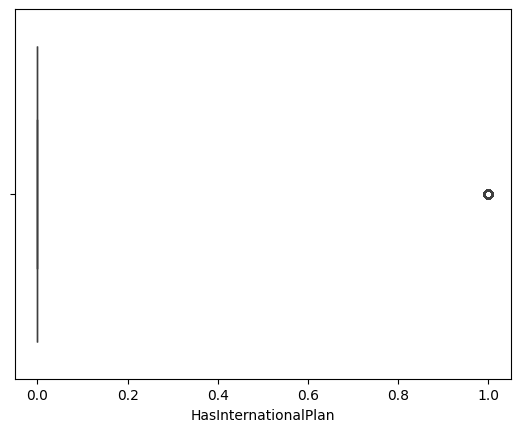


Estadísticas descriptivas para HasVoicemailPlan:
count    5000.000000
mean        0.264600
std         0.441164
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: HasVoicemailPlan, dtype: float64


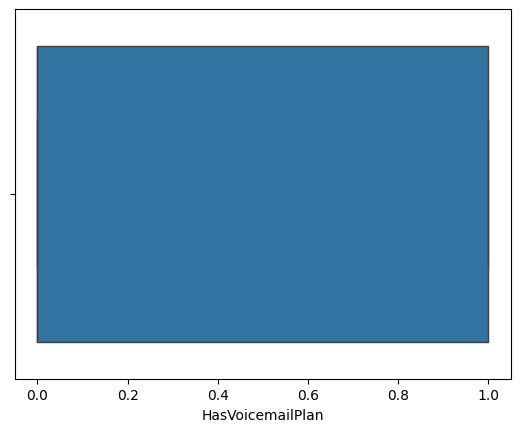


Estadísticas descriptivas para VoicemailMessageCount:
count    5000.000000
mean        7.755200
std        13.546393
min         0.000000
25%         0.000000
50%         0.000000
75%        17.000000
max        52.000000
Name: VoicemailMessageCount, dtype: float64


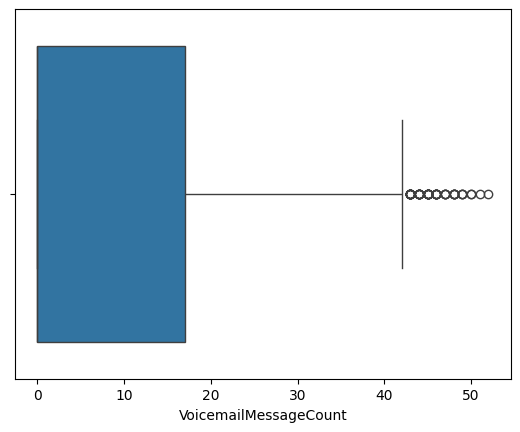


Estadísticas descriptivas para DayMinutes:
count    5000.000000
mean      180.288900
std        53.894699
min         0.000000
25%       143.700000
50%       180.100000
75%       216.200000
max       351.500000
Name: DayMinutes, dtype: float64


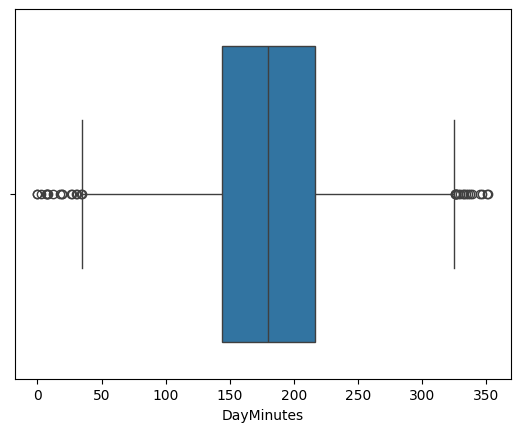


Estadísticas descriptivas para DayCalls:
count    5000.000000
mean      100.029400
std        19.831197
min         0.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       165.000000
Name: DayCalls, dtype: float64


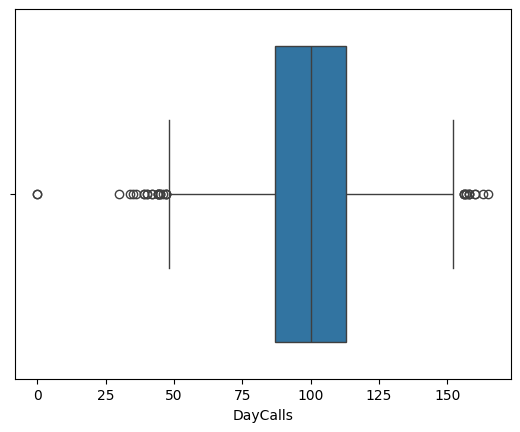


Estadísticas descriptivas para DayCharges:
count    5000.000000
mean       30.649668
std         9.162069
min         0.000000
25%        24.430000
50%        30.620000
75%        36.750000
max        59.760000
Name: DayCharges, dtype: float64


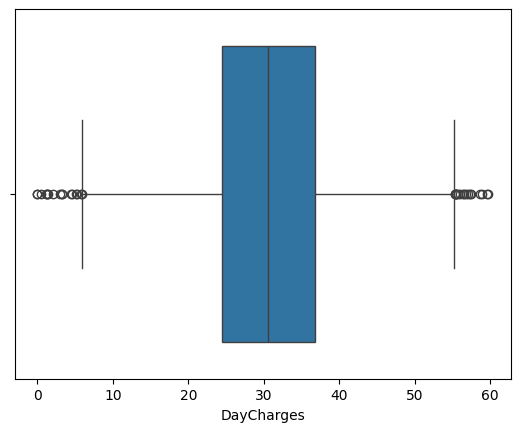


Estadísticas descriptivas para EveningMinutes:
count    5000.000000
mean      200.636560
std        50.551309
min         0.000000
25%       166.375000
50%       201.000000
75%       234.100000
max       363.700000
Name: EveningMinutes, dtype: float64


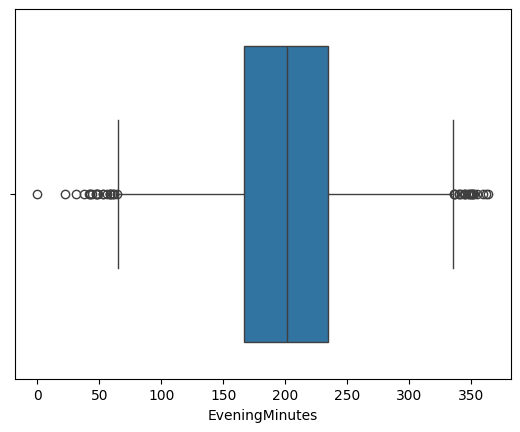


Estadísticas descriptivas para EveningCalls:
count    5000.000000
mean      100.191000
std        19.826496
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       170.000000
Name: EveningCalls, dtype: float64


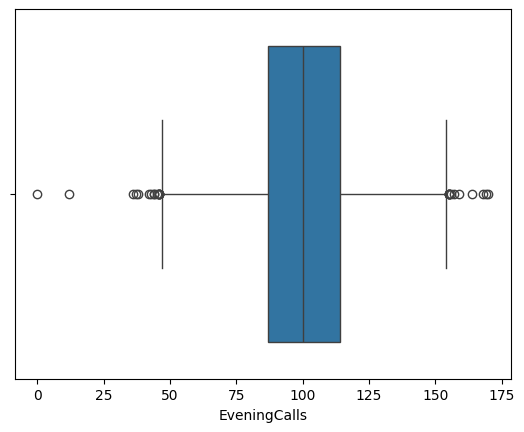


Estadísticas descriptivas para EveningCharges:
count    5000.000000
mean       17.054322
std         4.296843
min         0.000000
25%        14.140000
50%        17.090000
75%        19.900000
max        30.910000
Name: EveningCharges, dtype: float64


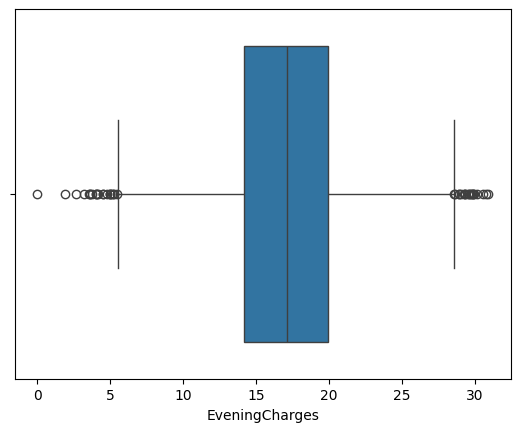


Estadísticas descriptivas para NightMinutes:
count    5000.000000
mean      200.391620
std        50.527789
min         0.000000
25%       166.900000
50%       200.400000
75%       234.700000
max       395.000000
Name: NightMinutes, dtype: float64


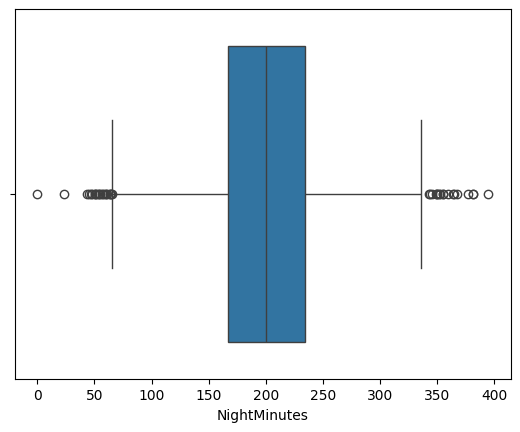


Estadísticas descriptivas para NightCalls:
count    5000.000000
mean       99.919200
std        19.958686
min         0.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       175.000000
Name: NightCalls, dtype: float64


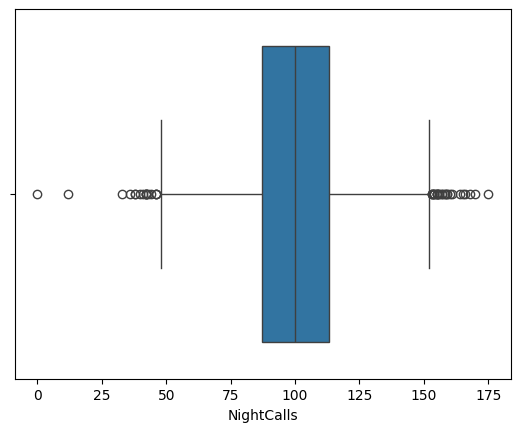


Estadísticas descriptivas para NightCharges:
count    5000.000000
mean        9.017732
std         2.273763
min         0.000000
25%         7.510000
50%         9.020000
75%        10.560000
max        17.770000
Name: NightCharges, dtype: float64


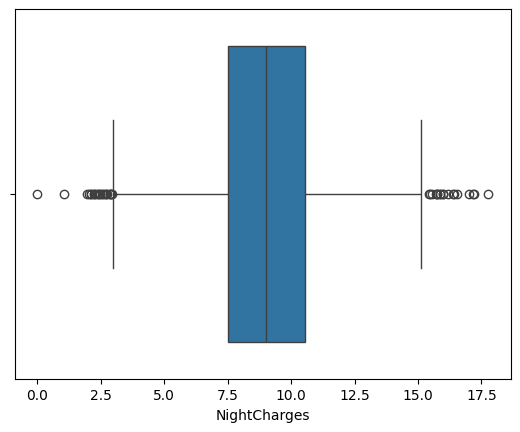


Estadísticas descriptivas para InternationalMinutes:
count    5000.000000
mean       10.261780
std         2.761396
min         0.000000
25%         8.500000
50%        10.300000
75%        12.000000
max        20.000000
Name: InternationalMinutes, dtype: float64


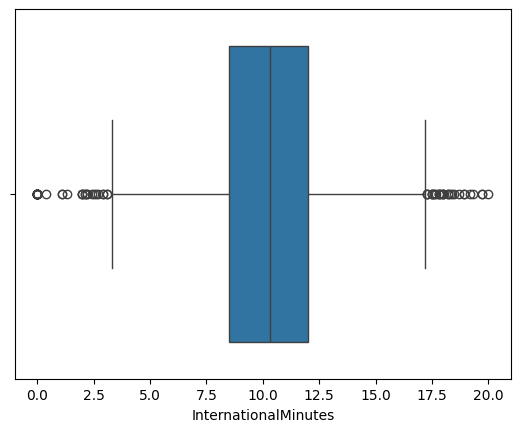


Estadísticas descriptivas para InternationalCalls:
count    5000.000000
mean        4.435200
std         2.456788
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: InternationalCalls, dtype: float64


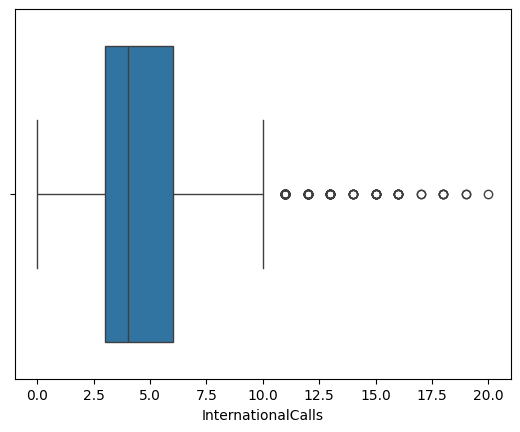


Estadísticas descriptivas para InternationalCharges:
count    5000.000000
mean        2.771196
std         0.745514
min         0.000000
25%         2.300000
50%         2.780000
75%         3.240000
max         5.400000
Name: InternationalCharges, dtype: float64


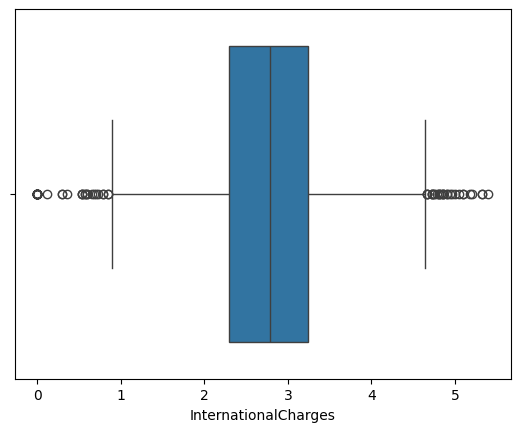


Estadísticas descriptivas para CustomerServiceCalls:
count    5000.000000
mean        1.570400
std         1.306363
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: CustomerServiceCalls, dtype: float64


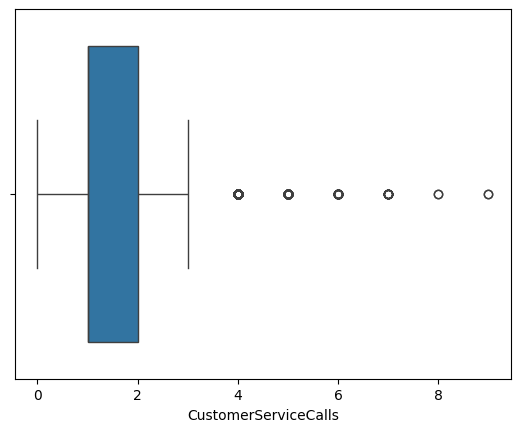

In [ ]:
numerical_cols = data.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 0:
        print("\nVariables Numéricas:")
        for col in numerical_cols:
            print(f"\nEstadísticas descriptivas para {col}:")
            stats = data[col].describe()
            print(stats)
            sns.boxplot(x=data[col])
            plt.show()


Comprobación de asimetría y normalidad

In [ ]:
#  Usar medidas como el coeficiente de asimetría y la kurtosis para verificar la forma de la distribución.
numerical_cols = data.select_dtypes(include=[np.number]).columns
results = {}

for col in numerical_cols:
    # Calcular estadísticas
    skewness = data[col].skew()
    kurtosis = data[col].kurtosis()

    # Clasificación de asimetría
    if abs(skewness) < 0.5:
        skew_quality = "Buena"
    elif 0.5 <= abs(skewness) <= 1:
        skew_quality = "Medianamente buena"
    else:
        skew_quality = "Mala"

    # Clasificación de curtosis
    if 1 <= kurtosis <= 10:
        kurt_quality = "Buena"
    elif kurtosis < 1 or kurtosis > 10:
        kurt_quality = "Mala"
    else:
        kurt_quality = "Medianamente buena"

    # Almacenar los resultados en el diccionario
    results[col] = {
        "Asimetría": skewness,
        "Curtosis": kurtosis,
        "Calidad Asimetría": skew_quality,
        "Calidad Curtosis": kurt_quality
    }

# Mostrar resultados
for col, metrics in results.items():
    print(f"\nEstadísticas para {col}:")
    print(f"Asimetría: {metrics['Asimetría']:.2f} ({metrics['Calidad Asimetría']})")
    print(f"Curtosis: {metrics['Curtosis']:.2f} ({metrics['Calidad Curtosis']})")



Estadísticas para CustomerChurn:
Asimetría: 2.06 (Mala)
Curtosis: 2.24 (Buena)

Estadísticas para AccountLength:
Asimetría: 0.11 (Buena)
Curtosis: -0.10 (Mala)

Estadísticas para HasInternationalPlan:
Asimetría: 2.77 (Mala)
Curtosis: 5.68 (Buena)

Estadísticas para HasVoicemailPlan:
Asimetría: 1.07 (Mala)
Curtosis: -0.86 (Mala)

Estadísticas para VoicemailMessageCount:
Asimetría: 1.35 (Mala)
Curtosis: 0.20 (Mala)

Estadísticas para DayMinutes:
Asimetría: -0.01 (Buena)
Curtosis: -0.02 (Mala)

Estadísticas para DayCalls:
Asimetría: -0.08 (Buena)
Curtosis: 0.18 (Mala)

Estadísticas para DayCharges:
Asimetría: -0.01 (Buena)
Curtosis: -0.02 (Mala)

Estadísticas para EveningMinutes:
Asimetría: -0.01 (Buena)
Curtosis: 0.05 (Mala)

Estadísticas para EveningCalls:
Asimetría: -0.02 (Buena)
Curtosis: 0.12 (Mala)

Estadísticas para EveningCharges:
Asimetría: -0.01 (Buena)
Curtosis: 0.05 (Mala)

Estadísticas para NightMinutes:
Asimetría: 0.02 (Buena)
Curtosis: 0.08 (Mala)

Estadísticas para NightC

# **Análisis bivariado**

Matriz de correlación

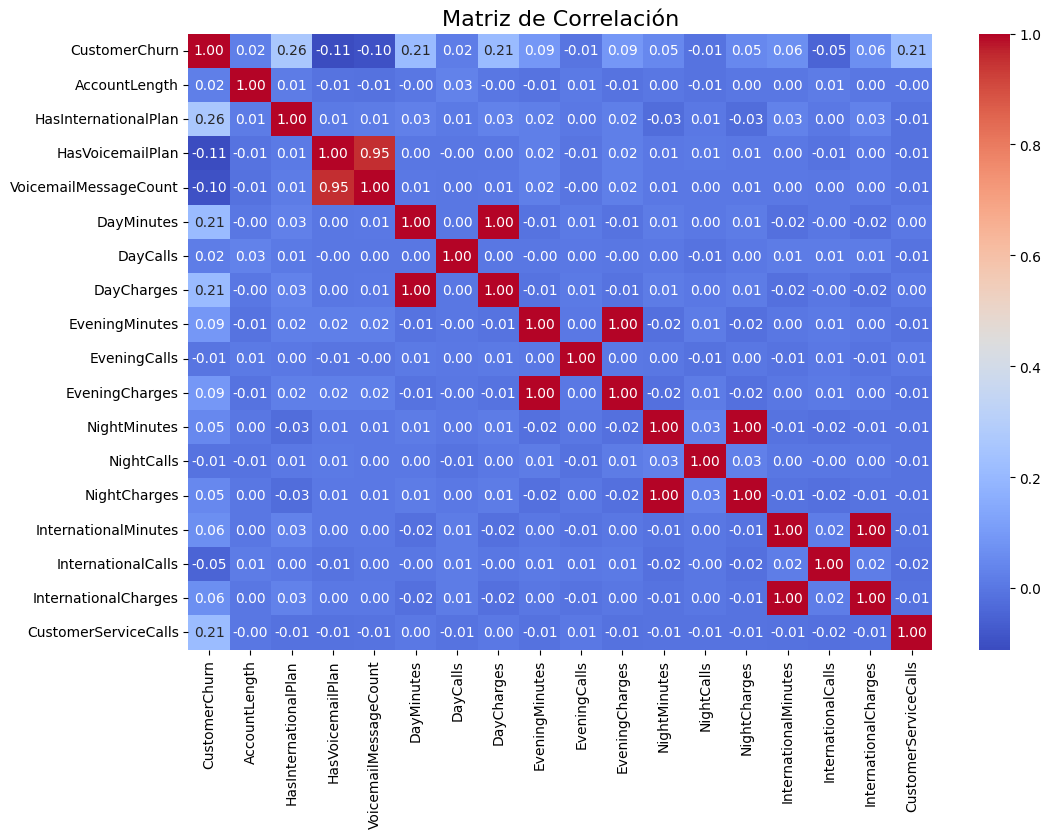

In [ ]:

# Seleccionar solo las columnas numéricas
matriz_correlacion = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))  # Ajusta el ancho y el alto
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
# Mostrar el gráfico
plt.title("Matriz de Correlación", fontsize=16)
plt.show()


Gráficos de dispersión

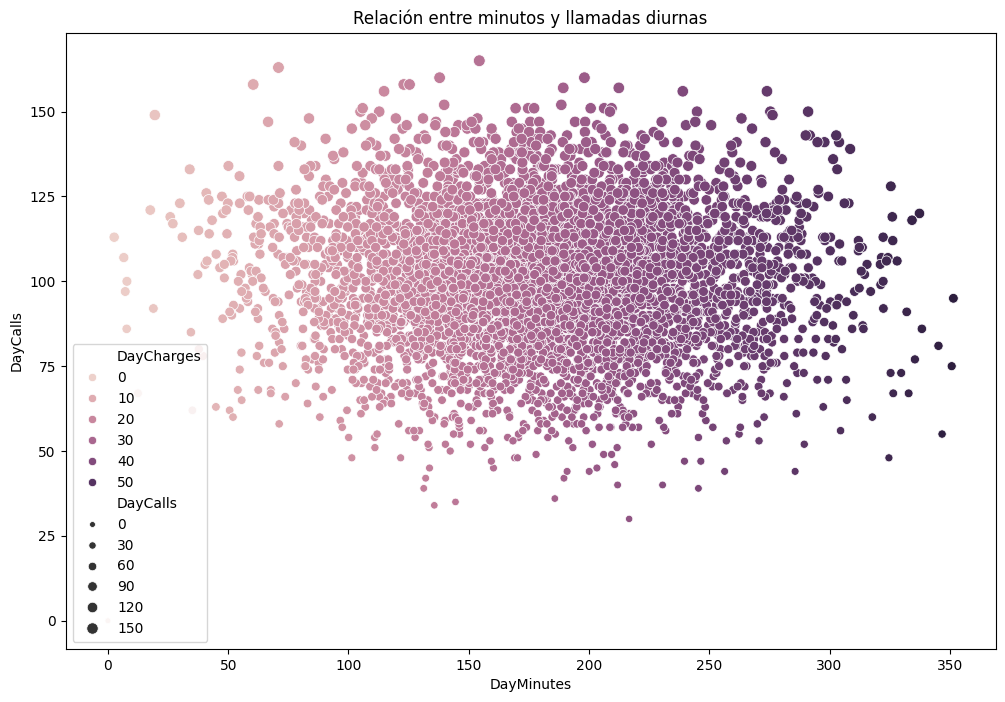

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='DayMinutes', y='DayCalls',data=data,hue="DayCharges",size="DayCalls")
plt.title("Relación entre minutos y llamadas diurnas")
plt.show()

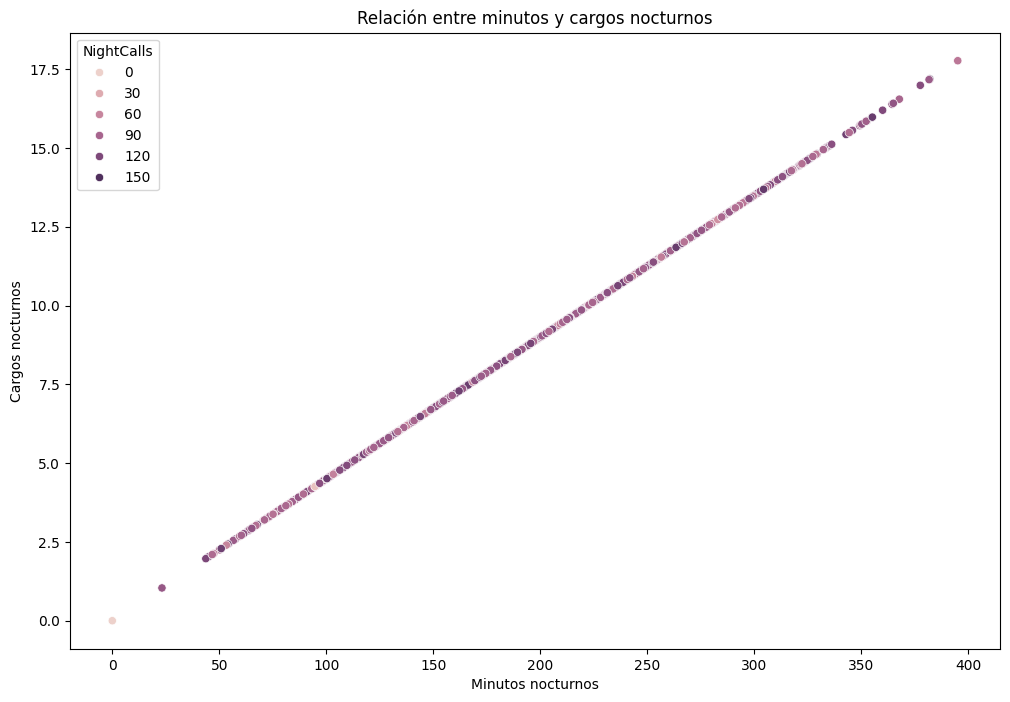

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='NightMinutes', y='NightCharges', data=data,hue="NightCalls")
plt.title("Relación entre minutos y cargos nocturnos")
plt.xlabel("Minutos nocturnos")
plt.ylabel("Cargos nocturnos")
plt.show()

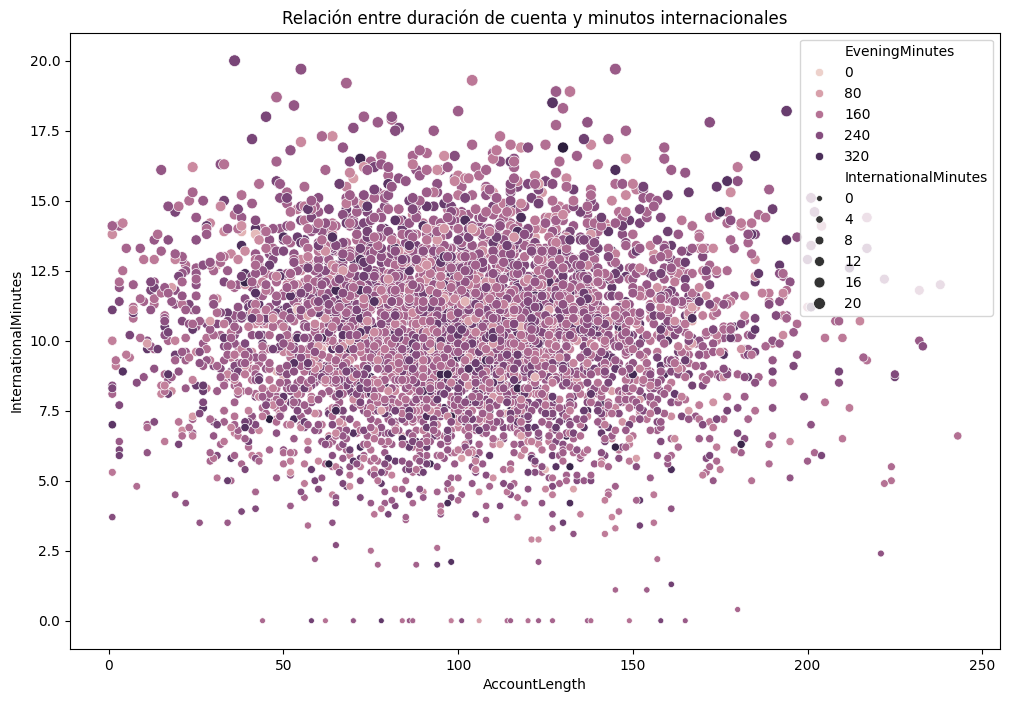

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data,x='AccountLength', y='InternationalMinutes', size='InternationalMinutes', hue='EveningMinutes')
plt.title("Relación entre duración de cuenta y minutos internacionales")
plt.show()

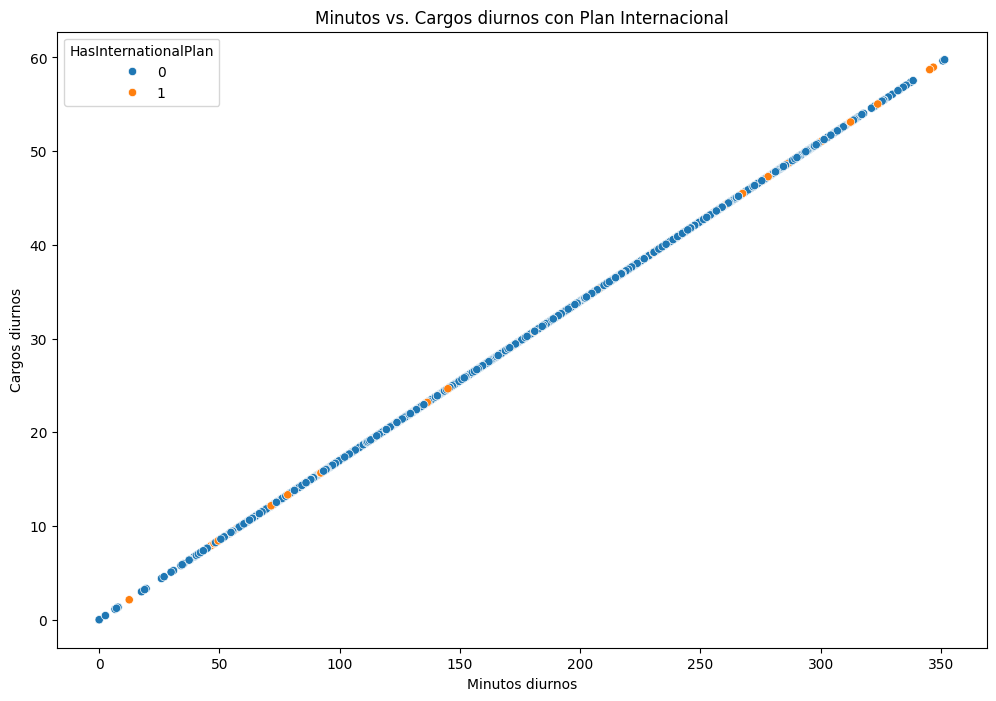

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='DayMinutes', y='DayCharges', hue='HasInternationalPlan', data=data)
plt.title("Minutos vs. Cargos diurnos con Plan Internacional")
plt.xlabel("Minutos diurnos")
plt.ylabel("Cargos diurnos")
plt.show()

Boxplots y análisis por categorías

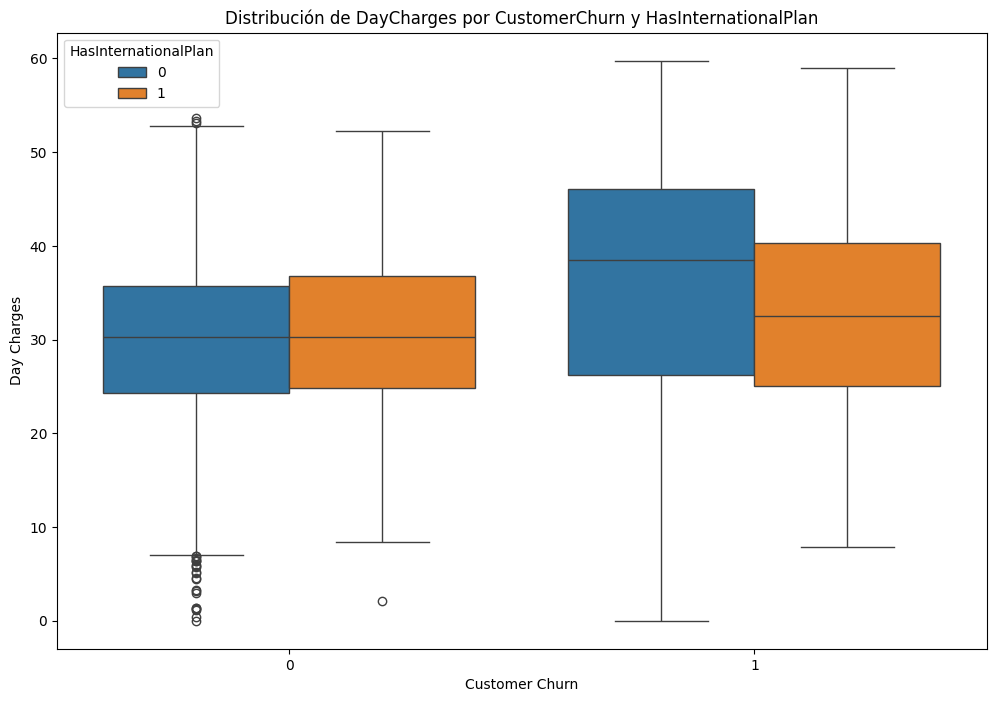

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='CustomerChurn', y='DayCharges', hue='HasInternationalPlan', data=data)
plt.title("Distribución de DayCharges por CustomerChurn y HasInternationalPlan")
plt.xlabel("Customer Churn")
plt.ylabel("Day Charges")
plt.show()

# **Análisis de distribuciones y sesgos**

Comprobación de sesgo en los datos

<ipython-input-22-13cb25bbba6c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  catplot = sns.catplot(


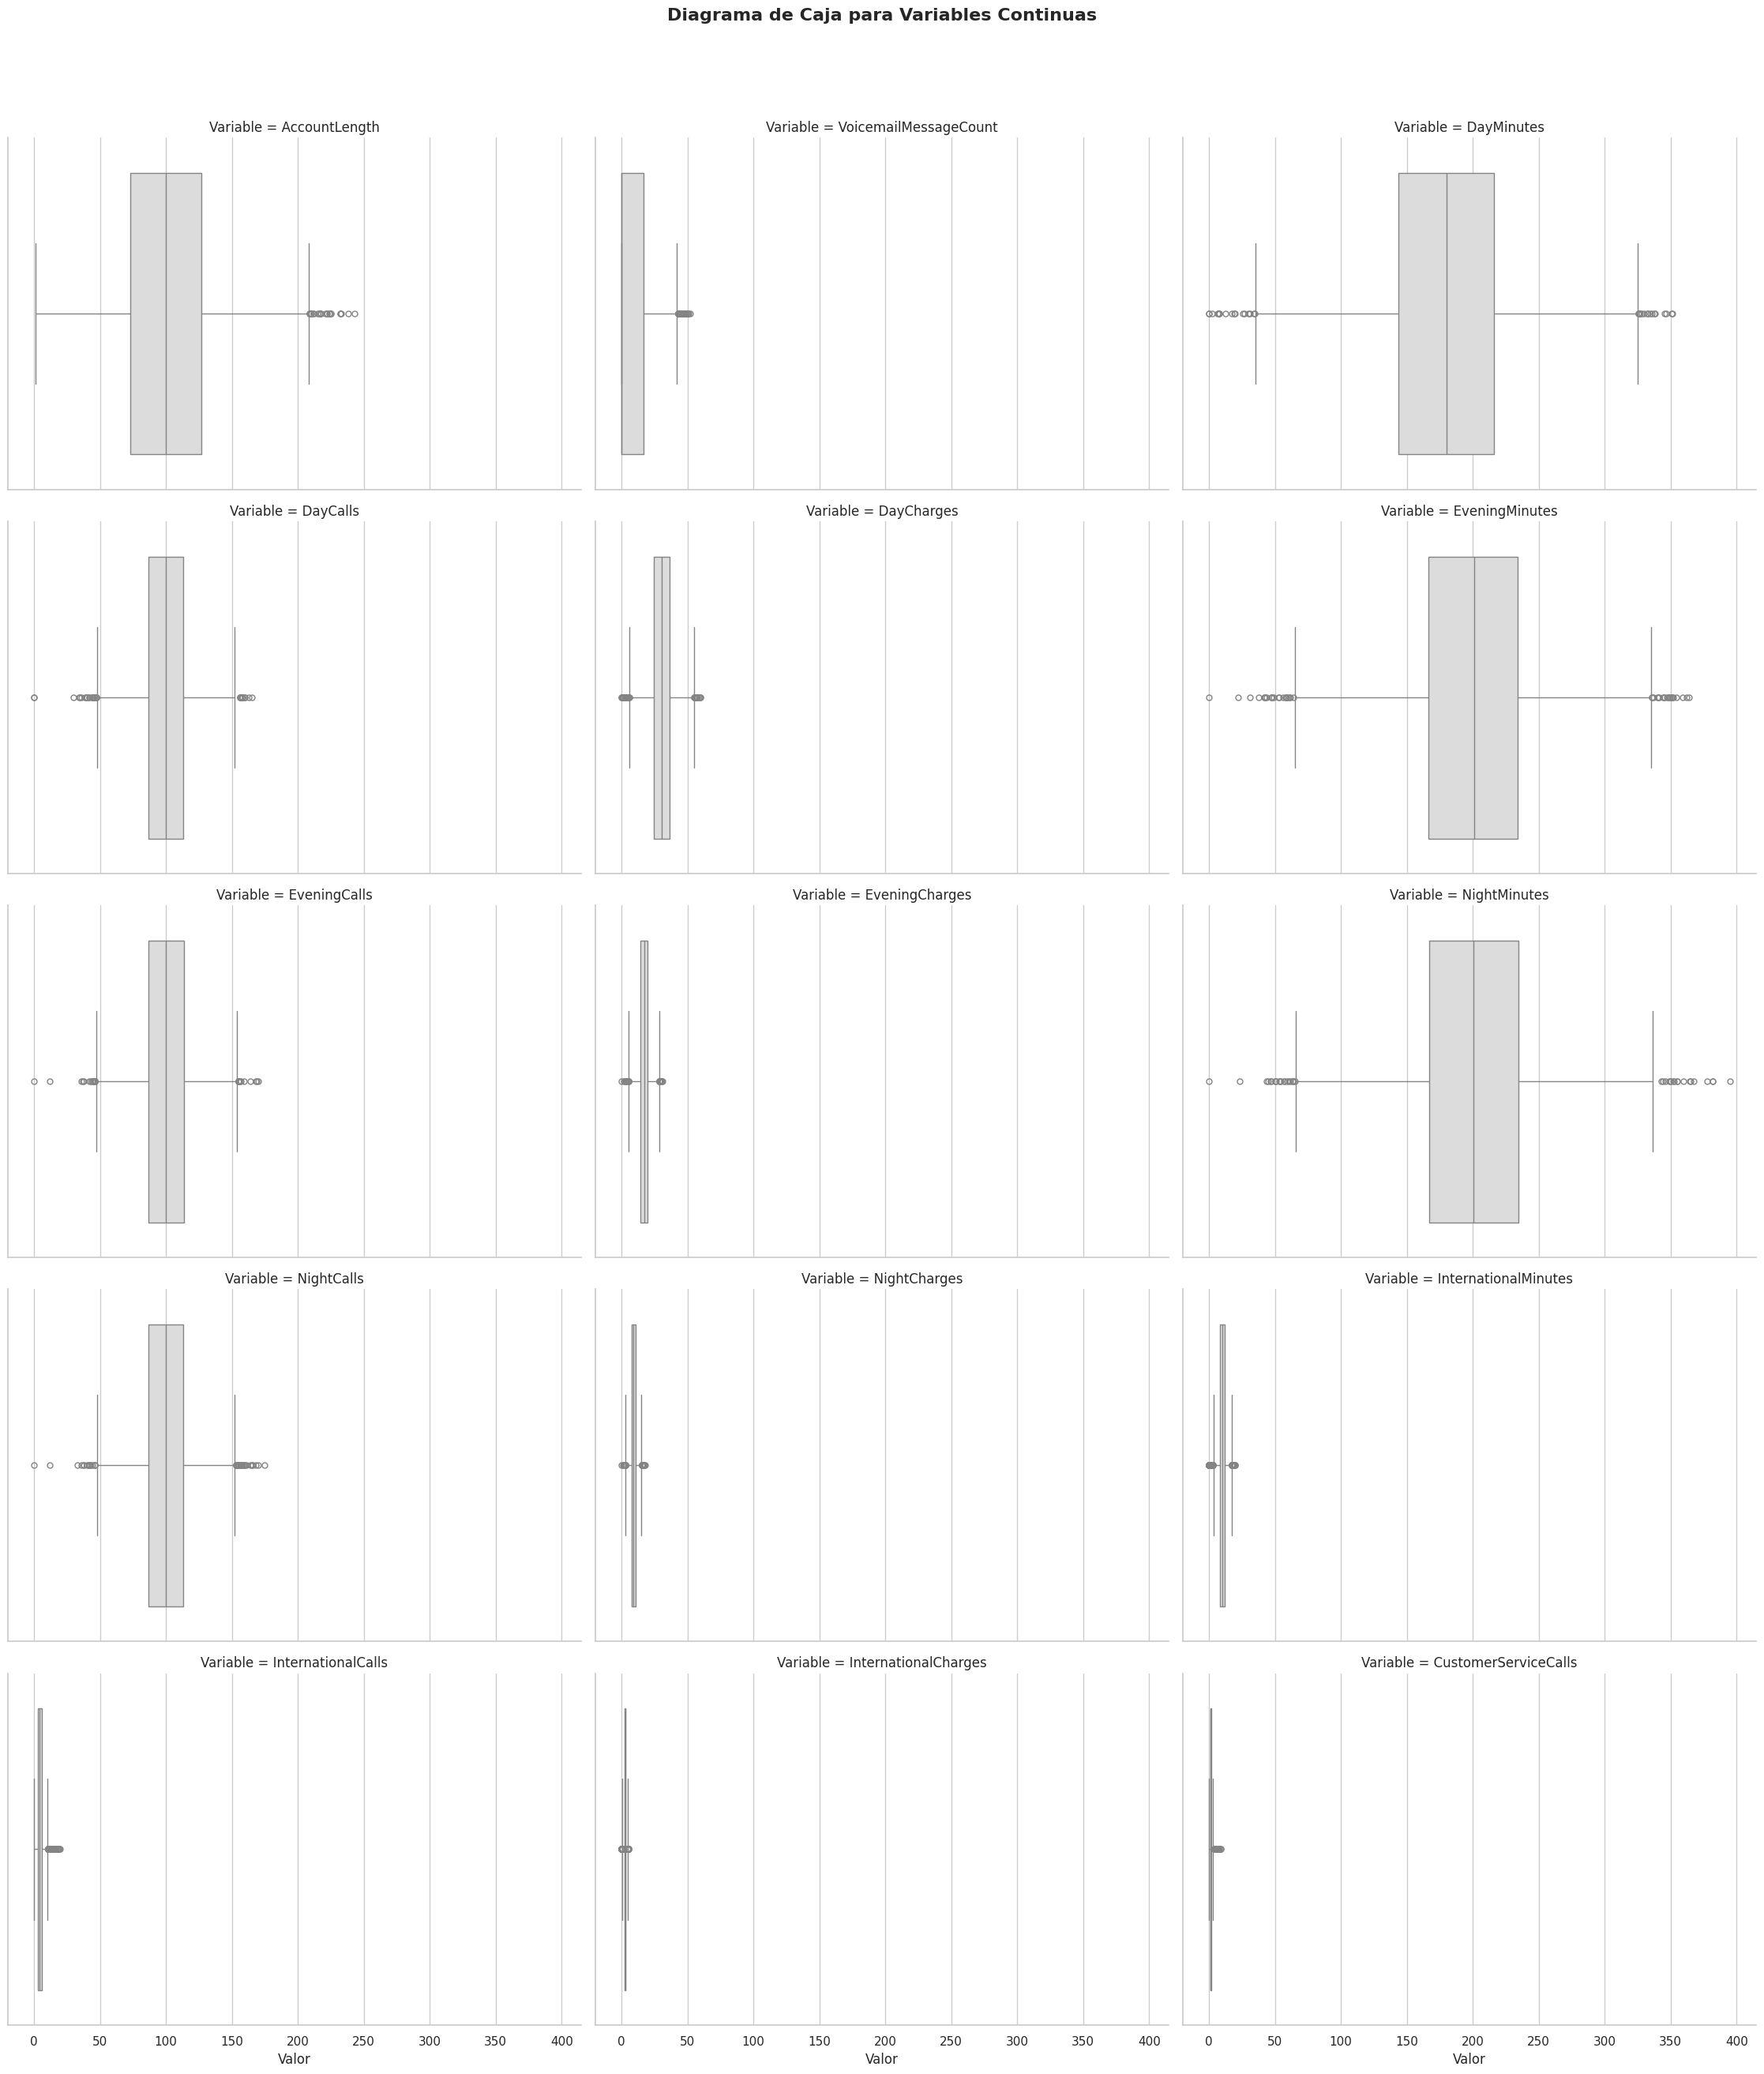

In [ ]:
#  Utiliza diagramas de caja o distribuciones para detectar la presencia de sesgo o desbalance en las variables.

sns.set(style="whitegrid")

# Dividir variables categóricas y numéricas
categorical_cols = ['CustomerChurn', 'HasInternationalPlan', 'HasVoicemailPlan']
numerical_cols = [col for col in data.columns if col not in categorical_cols]

# Transformar datos para catplot
# Convertimos las columnas numéricas en un formato adecuado para catplot
data_long = data[numerical_cols].melt(var_name="Variable", value_name="Valor")

# Crear el catplot
catplot = sns.catplot(
    x="Valor",
    data=data_long,
    kind="box",
    col="Variable",
    col_wrap=3,  # Máximo de 3 columnas por fila
    aspect=1.5,  # Ajuste del aspecto
    palette="coolwarm",  # Paleta de colores
    legend=False  # Sin leyenda
)

# Configurar título global
catplot.fig.suptitle("Diagrama de Caja para Variables Continuas", y=1.05, fontsize=16, fontweight="bold")

# Mostrar gráfico
plt.show()

Transformaciones de variables

In [ ]:
#Si es necesario, transforma las variables para
#corregir sesgos (por ejemplo, logaritmos o raíces cuadradas en variables sesgadas).

# Crear un diccionario para guardar las variables transformadas
dic = {}

# Aplicar transformaciones para corregir sesgos
dic['VoicemailMessageCount_trans'] = np.sqrt(data['VoicemailMessageCount'])  # Raíz cuadrada
dic['NightCalls_trans'] = np.sqrt(data['NightCalls'])                       # Raíz cuadrada
dic['InternationalCalls_trans'] = np.log1p(data['InternationalCalls'])      # Logaritmo (log(1+x) para manejar ceros)
dic['CustomerServiceCalls_trans'] = np.log1p(data['CustomerServiceCalls'])  # Logaritmo (log(1+x) para manejar ceros)

# Asignar las transformaciones al DataFrame
for key, value in dic.items():
    data[key] = value

# Verificar los resultados
print(data[['VoicemailMessageCount', 'VoicemailMessageCount_trans']].head())
print(data[['NightCalls', 'NightCalls_trans']].head())
print(data[['InternationalCalls', 'InternationalCalls_trans']].head())
print(data[['CustomerServiceCalls', 'CustomerServiceCalls_trans']].head())









   VoicemailMessageCount  VoicemailMessageCount_trans
0                     25                      5.00000
1                     26                      5.09902
2                      0                      0.00000
3                      0                      0.00000
4                      0                      0.00000
   NightCalls  NightCalls_trans
0          91          9.539392
1         103         10.148892
2         104         10.198039
3          89          9.433981
4         121         11.000000
   InternationalCalls  InternationalCalls_trans
0                   3                  1.386294
1                   3                  1.386294
2                   5                  1.791759
3                   7                  2.079442
4                   3                  1.386294
   CustomerServiceCalls  CustomerServiceCalls_trans
0                     1                    0.693147
1                     1                    0.693147
2                     0                 

# **Detección de valores atípicos**

Boxplots

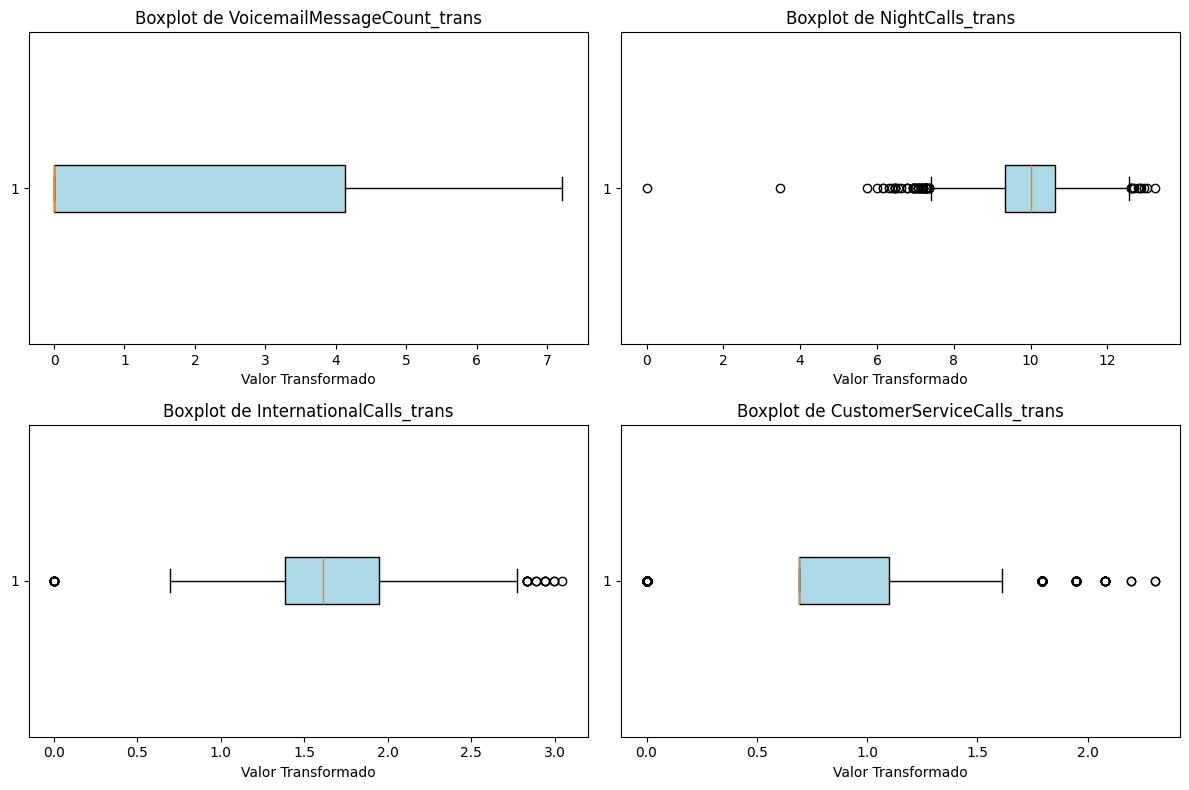

In [ ]:
#Utiliza diagramas de caja para detectar posibles valores atípicos (outliers)
# Crear diagramas de caja para cada variable transformada

data_transformed = {
    'VoicemailMessageCount_trans': np.sqrt(data['VoicemailMessageCount']),
    'NightCalls_trans': np.sqrt(data['NightCalls']),
    'InternationalCalls_trans': np.log1p(data['InternationalCalls']),
    'CustomerServiceCalls_trans': np.log1p(data['CustomerServiceCalls'])
}

plt.figure(figsize=(12, 8))
for i, (col, values) in enumerate(data_transformed.items(), start=1):
    plt.subplot(2, 2, i)
    plt.boxplot(values, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.title(f"Boxplot de {col}")
    plt.xlabel("Valor Transformado")

plt.tight_layout()
plt.show()

Análisis visual de gráficos de dispersión

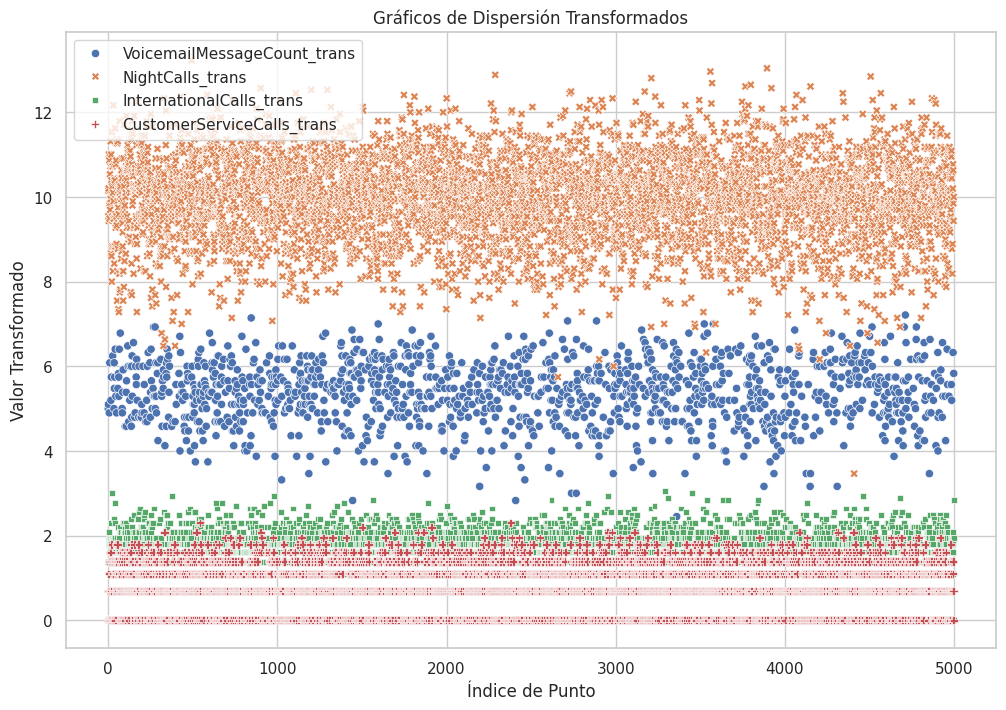

In [ ]:
# Si trabajas con datos numéricos, observa
#si hay puntos que se alejan significativamente de la tendencia general.
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_transformed)
plt.title("Gráficos de Dispersión Transformados")
plt.xlabel("Índice de Punto")
plt.ylabel("Valor Transformado")
plt.show()

Z-scores o IQR

In [ ]:
#Aplica la técnica de puntuaciones Z (para distribuciones normales) o
#el rango intercuartílico (IQR) para detectar y gestionar los outliers.

from scipy.stats import zscore


df = pd.DataFrame(data_transformed)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns


def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    # Obtain IQR
    IQR = Q3 - Q1
    # Upper and lower thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Detectar outliers en todas las columnas numéricas
outliers_mask = df[numeric_columns].apply(detect_outliers_iqr)
outliers_iqr = df[outliers_mask.any(axis=1)]

print(f"Número de outliers encontrados con IQR: {len(outliers_iqr)}")

Número de outliers encontrados con IQR: 1243


In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=f60d51fe7456a4fe6db7e6c4ba16041f5be020c676cbd1f22020da4233fcb502
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [ ]:
# Importar MAD estimator
from pyod.models.mad import MAD
import numpy as np
import pandas as pd
import warnings

# Suprimir advertencias de Runtime
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Asumiendo que df ya está definido

try:
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Inicializar lista para almacenar outliers
    all_outliers = []

    # Iterar sobre cada columna numérica
    for column in numeric_columns:
        column_data = df[column].dropna()  # Descartar NaNs antes de procesar
        if column_data.empty:
            print(f'La columna "{column}" no tiene datos válidos.')
            continue

        # Verificar si la varianza es cero
        if column_data.var() == 0:
            print(f'La columna "{column}" tiene varianza cero, no se procesará.')
            continue

        # Convertir la columna a una matriz de 2 dimensiones
        column_reshaped = column_data.values.reshape(-1, 1)

        # Reemplazar valores infinitos en la matriz
        column_scaled = np.nan_to_num(column_reshaped, nan=0.0, posinf=0.0, neginf=0.0)

        try:
            mad = MAD(threshold=3)
            mad.fit(column_scaled)

            # Identificar etiquetas de outliers
            labels = mad.labels_

            # Obtener los índices originales de los valores atípicos
            column_outliers = column_data.index[labels == 1]
            print(f'Índices de outliers en la columna "{column}": {column_outliers.tolist()}')
            all_outliers.extend(column_outliers)

        except Exception as e:
            print(f'Ocurrió un error al procesar la columna "{column}": {e}')
            continue

    # Eliminar duplicados
    unique_outliers = list(set(all_outliers))

    print(f'Número total de filas con outliers: {len(unique_outliers)}')
    # Opcional: mostrar índices de filas con outliers
    # print(f'Índices de filas con outliers: {unique_outliers}')

except Exception as e:
    print(f'Ocurrió un error en el proceso general: {e}')

# Podemos observar que habían más outliers que lo que representaba la libreria original

Índices de outliers en la columna "VoicemailMessageCount_trans": [0, 1, 6, 9, 16, 18, 26, 34, 35, 36, 38, 41, 45, 49, 57, 61, 62, 63, 65, 71, 82, 83, 85, 88, 100, 106, 107, 108, 115, 118, 121, 127, 129, 136, 138, 139, 141, 142, 149, 157, 159, 162, 165, 166, 168, 171, 180, 182, 194, 195, 198, 200, 205, 212, 213, 221, 227, 228, 229, 231, 236, 246, 249, 250, 253, 255, 260, 265, 266, 268, 272, 274, 277, 278, 282, 283, 285, 290, 293, 294, 311, 316, 317, 318, 319, 321, 325, 326, 327, 335, 342, 343, 344, 346, 348, 351, 357, 358, 359, 362, 375, 383, 395, 400, 402, 418, 420, 423, 424, 427, 434, 435, 440, 442, 449, 451, 453, 458, 462, 464, 466, 468, 469, 473, 474, 477, 485, 493, 496, 500, 501, 503, 506, 508, 509, 510, 513, 514, 515, 522, 527, 530, 532, 533, 536, 537, 540, 541, 542, 544, 545, 547, 548, 549, 555, 557, 561, 562, 564, 566, 569, 571, 573, 575, 578, 579, 581, 589, 593, 595, 599, 607, 613, 614, 615, 616, 622, 626, 632, 633, 635, 637, 638, 644, 645, 646, 648, 652, 653, 654, 661, 665, 66

Gráficos de barras

In [ ]:
#Para datos categóricos, usa gráficos de barras para visualizar la
#frecuencia o la proporción de cada categoría.

Gráficos de líneas

In [ ]:
# Si los datos son temporales o secuenciales, usa gráficos de
#líneas para analizar tendencias a lo largo del tiempo.

Diagramas de dispersión

In [ ]:
#Para explorar relaciones entre variables continuas.

Gráficos de densidad

In [ ]:
# Para observar la distribución de los datos en comparación con
#un histograma.

 # **Normalización de datos**

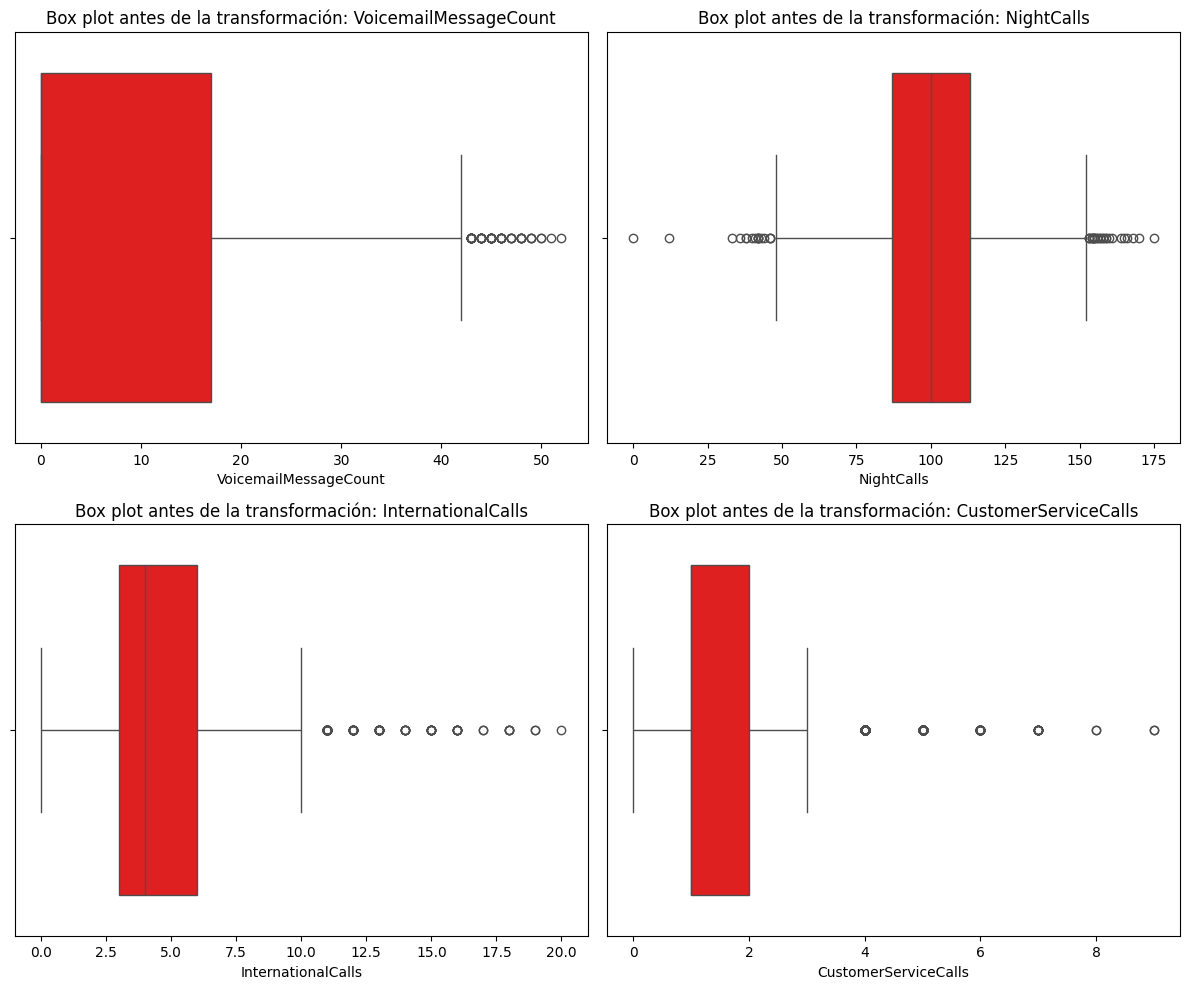

In [ ]:
# Normalización, estandarización o escalado: determine si el conjunto de dato
#requiere alguna de las técnicas indicadas justifique su respuesta.

from scipy.stats.mstats import winsorize


# Crear una figura y un conjunto de ejes para mostrar gráficos de 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Lista de nombres de variables para iterar
columns = ['VoicemailMessageCount', 'NightCalls', 'InternationalCalls', 'CustomerServiceCalls']

# Iterar sobre las columnas para graficar antes y después de la transformación
for i, column in enumerate(columns):
    # Graficar el boxplot antes de la transformación
    sns.boxplot(data=data, x=column, ax=axes[i//2, i%2], color='red')
    axes[i//2, i%2].set_title(f'Box plot antes de la transformación: {column}')

plt.tight_layout()

plt.show()

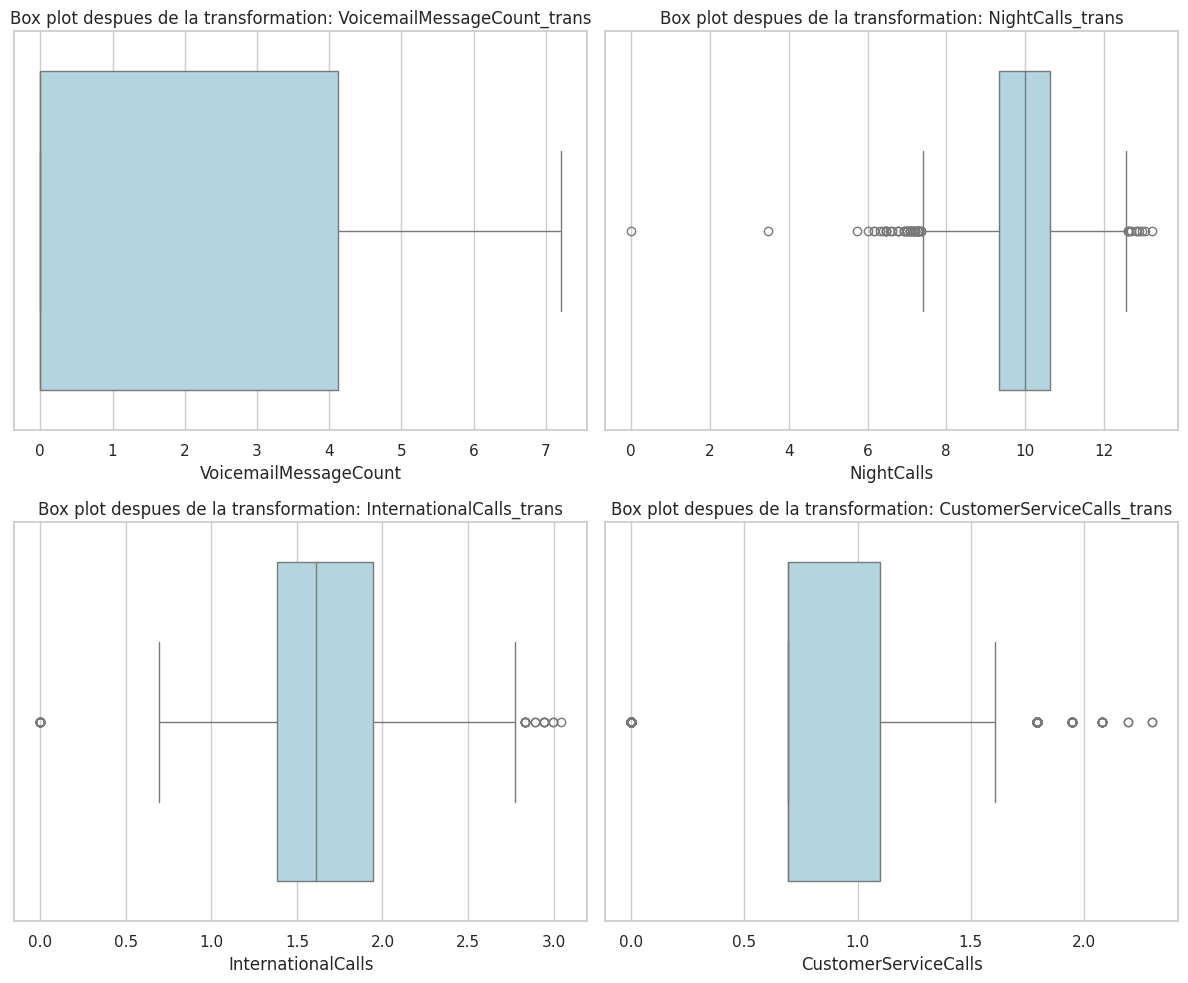

In [ ]:
df_winsorized = df.copy()
df_winsorized['VoicemailMessageCount_trans'] = winsorize(df_winsorized['VoicemailMessageCount_trans'], limits = [0.05, 0.05], inplace = True)
df_winsorized['NightCalls_trans'] = winsorize(df_winsorized['NightCalls_trans'], limits = [0.05, 0.05], inplace = True)
df_winsorized['InternationalCalls_trans'] = winsorize(df_winsorized['InternationalCalls_trans'], limits = [0.05, 0.05], inplace = True)
df_winsorized['CustomerServiceCalls_trans'] = winsorize(df_winsorized['CustomerServiceCalls_trans'], limits = [0.05, 0.05], inplace = True)
# Crear una figura y un conjunto de ejes para mostrar gráficos de 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

columns = ['VoicemailMessageCount_trans', 'NightCalls_trans', 'InternationalCalls_trans', 'CustomerServiceCalls_trans']
# Iterar sobre las columnas para graficar antes y después de la transformación
for i, columna in enumerate(columns):
  # Graficar el boxplot después de la transformación
    transformed_column = data_transformed[columna]  # Acceder directamente a la columna transformada
    sns.boxplot(data=df_winsorized, x=transformed_column, ax=axes[(i//2), (i%2)],color='lightblue')  # Colocar en la segunda columna de la misma fila
    axes[i//2, (i%2)].set_title(f'Box plot despues de la transformation: {columna}')

plt.tight_layout()

plt.show()

#  **Resúmenes y conclusiones**

In [ ]:
# Aquí mismo pueden ir haciendo las anotaciones para luego colocarlas en el docuemnto - dcKeisy

#Resumen de hallazgos: Documenta los hallazgos clave durante el EDA, como
#relaciones interesantes entre variables, distribuciones inusuales, la calidad de los
#datos y las variables más importantes.

#Preparación para modelado: Después del EDA, documente las decisiones de qué
#pasos seguir para el modelado, como la selección de variables, transformación de
#datos, o el manejo de datos faltantes.

# **Aplicación de Machine Learning**

Cargar el conjunto de datos procesado (resultado del laboratorio)

In [ ]:
# Si ya se procesó el dataset en el laboratorio, cargarlo nuevamente
df = pd.read_csv("ruta_a_dataset_procesado.csv")

División de datos en entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

# Separar características (X) y etiqueta (y)
X = data.drop('DayCharges', axis=1)
y = data['AccountLength']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Selección y entrenamiento de modelos

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Modelo 1: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Modelo 2: Regresión logística
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluación del modelo

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Evaluar Random Forest
rf_pred = rf_model.predict(X_test)
print("Reporte de clasificación (Random Forest):")
print(classification_report(y_test, rf_pred))

# Evaluar Regresión Logística
lr_pred = lr_model.predict(X_test)
print("\nReporte de clasificación (Regresión Logística):")
print(classification_report(y_test, lr_pred))

NameError: name 'rf_model' is not defined

Ajuste de parámetros con Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

# Búsqueda de mejor configuración
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 